In [1]:
import numpy as np
import pandas as pd


In [4]:
pip install tensorflow


  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.5-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached wrapt-2.1.1-cp312-cp312-win_amd64.whl.metadata (7.6 kB)
  Using cached grpcio-1.76.0-cp312-cp312-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached h5p

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 8.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/8.0 MB 7.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 7.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.2 MB/s  0:00:01

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- ----

# Block 1: Data Loading and Normalization

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [3]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [4]:
# Normalize: Scale pixel values from 0-255 to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0


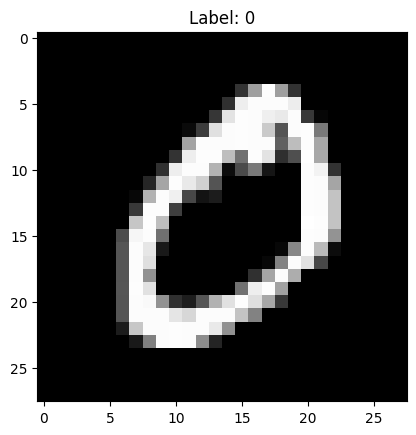

In [5]:
# Visualize the first sample
plt.imshow(x_train[1], cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.show()


# Block 2: Defining the Shallow Architecture

In [6]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Input Layer
    layers.Dense(128, activation='relu'),  # Hidden Layer (The 'Brain')
    layers.Dense(10, activation='softmax') # Output Layer (10 classes)
])


C:\Users\Muthusamy\miniconda3\envs\DeepLearning\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Block 3: Compiling and Training

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [9]:
# Train for 5 iterations
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9208 - loss: 0.2767 - val_accuracy: 0.9638 - val_loss: 0.1275
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9628 - loss: 0.1246 - val_accuracy: 0.9723 - val_loss: 0.0972
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9745 - loss: 0.0850 - val_accuracy: 0.9742 - val_loss: 0.0923
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9810 - loss: 0.0640 - val_accuracy: 0.9742 - val_loss: 0.0844
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9854 - loss: 0.0493 - val_accuracy: 0.9775 - val_loss: 0.0795


# Block 4: Results and Evaluation

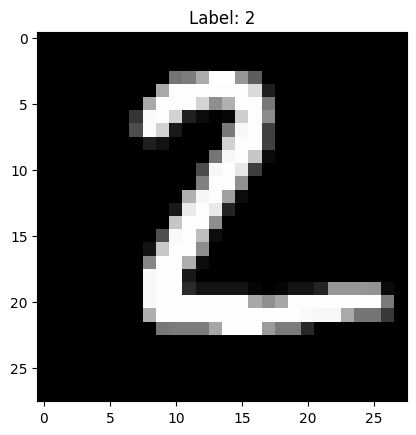

In [10]:
# Visualize the first sample
plt.imshow(x_test[1], cmap='gray')
plt.title(f"Label: {y_test[1]}")
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nFinal Test Accuracy: {test_acc*100:.2f}%')


313/313 - 2s - 6ms/step - accuracy: 0.9747 - loss: 0.0862

Final Test Accuracy: 97.47%


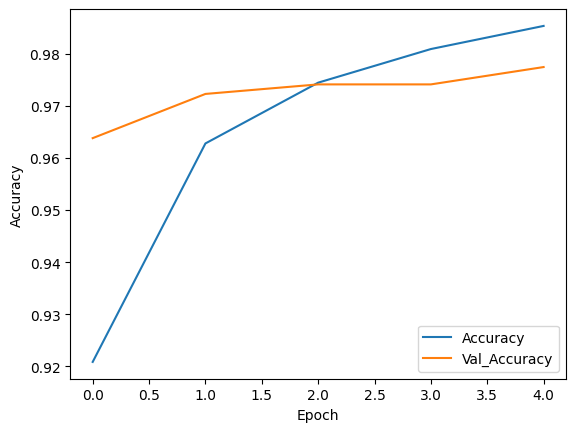

In [12]:
# Plotting the Training Accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


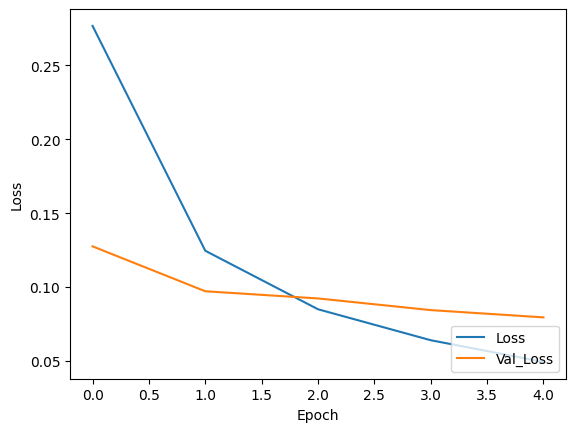

In [13]:
# Plotting the Training Loss
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Val_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

# Student Exercise Questions & Answers

Q1: What happens to the accuracy if you reduce the hidden layer neurons to 4?

Q2: Replace 'relu' with 'linear' activation in the hidden layer. Does it improve?

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [23]:
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    accuracy_score, precision_recall_fscore_support, 
    roc_curve, auc)

In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [27]:
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


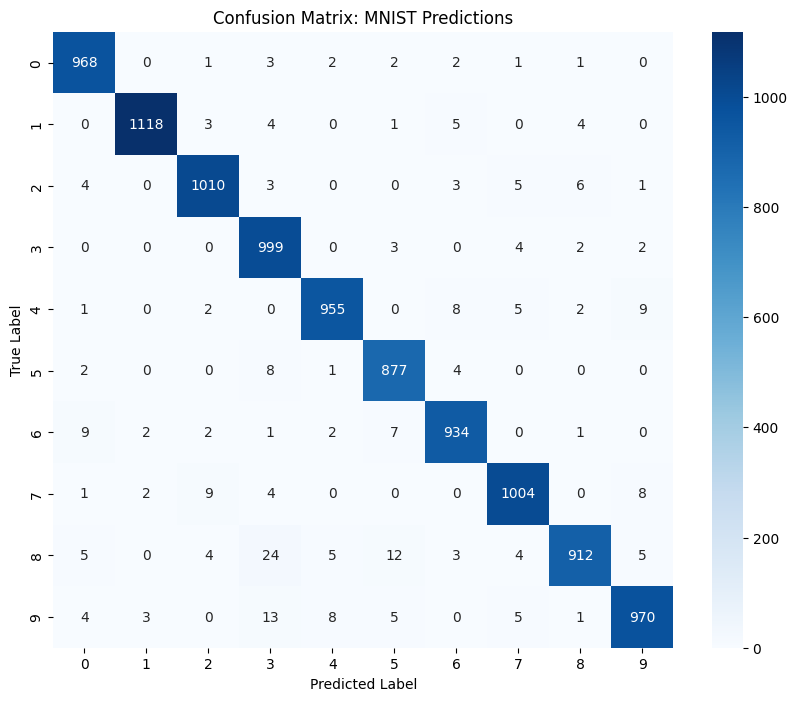

Global Accuracy: 0.9747
Macro Precision: 0.9746
Macro Recall (Sensitivity): 0.9746
Macro F1-Score: 0.9745
Average Specificity: 0.9972


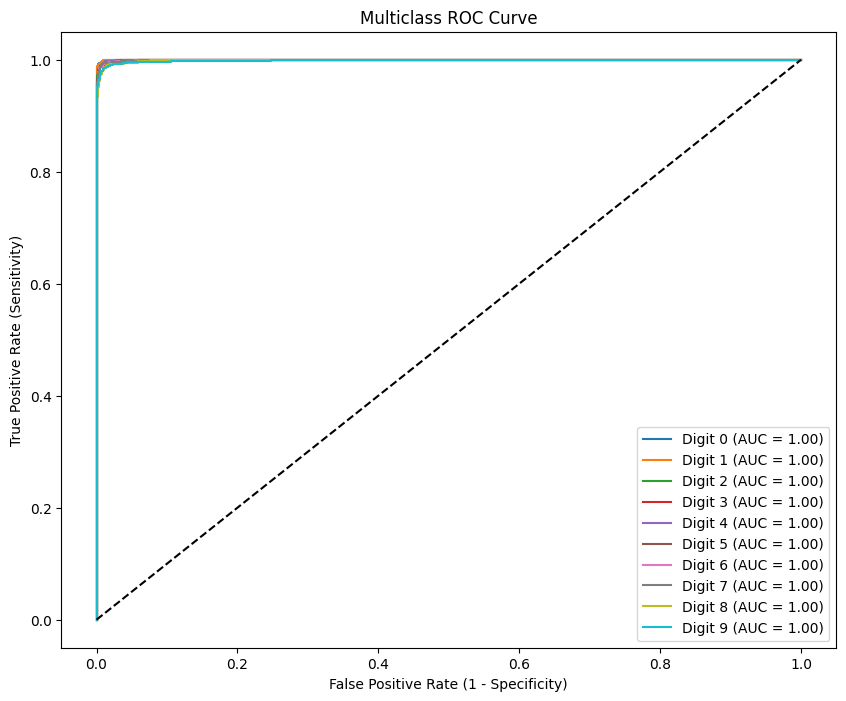

In [28]:
from sklearn.preprocessing import LabelBinarizer

# 1. Generate Predictions
y_probs = model.predict(x_test)      # Probability distributions
y_pred = np.argmax(y_probs, axis=1)  # Class with highest probability

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: MNIST Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. Accuracy, Precision, Recall, F1, and Sensitivity
# In multiclass, Recall is mathematically the same as Sensitivity.
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Global Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall (Sensitivity): {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# 4. Specificity Calculation (Per Class)
# Specificity = TN / (TN + FP)
def calculate_specificity(conf_matrix):
    specificities = []
    for i in range(len(conf_matrix)):
        temp_cm = np.delete(conf_matrix, i, 0) # delete row i
        temp_cm = np.delete(temp_cm, i, 1)    # delete col i
        tn = temp_cm.sum()
        fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
        spec = tn / (tn + fp)
        specificities.append(spec)
    return np.mean(specificities)

avg_specificity = calculate_specificity(cm)
print(f"Average Specificity: {avg_specificity:.4f}")

# 5. Multiclass AU-ROC Curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Digit {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()